In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from tqdm import tqdm
from collections import defaultdict
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import timedelta
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
%cd "/mnt/sdb/arafat/U-Extend/backup"

/mnt/sdb/arafat/U-Extend/backup


In [3]:
def listdir_nohidden(path):
    for f in os.listdir(path):
        if not f.startswith('.'):
            yield f
            
def process_folder_old(pid, visit, labels_fl, left_fl, right_fl):
    labels = pd.read_csv('UEXTEND IMU data2/{}/{}/{}'.format(pid, visit, labels_fl), parse_dates=['Start','Stop'], 
                         date_parser=lambda x: pd.to_datetime(x, format='%M:%S.%f'))
    labels = labels.dropna(subset=['Start', 'Stop'])
    
    left = pd.read_csv('UEXTEND IMU data2/{}/{}/{}'.format(pid, visit, left_fl), parse_dates=['time'], index_col='time',
                        date_parser=lambda x: pd.to_datetime(x, format='%M:%S.%f'))
    
    right = pd.read_csv('UEXTEND IMU data2/{}/{}/{}'.format(pid, visit, right_fl), parse_dates=['time'], index_col='time',
                       date_parser=lambda x: pd.to_datetime(x, format='%M:%S.%f'))
    trajs = []
    
    i = 1
    
    for idx, row in labels.iterrows():
    #for i, g in labels.groupby(['Arm','Label']):
        
        start = row['Start']
        stop = row['Stop']
                       
        traj_df =  right if (row['Arm']=='RIGHT') else left
        #import pdb; pdb.set_trace()
        #print(row['Start'], row['Stop'])
        traj = traj_df[(traj_df.index >= start) & (traj_df.index <= stop)].copy()
        
        traj['pid']=pid
        traj['visit']=visit
        traj['arm'] = row['Arm']
        traj['activity']=row['Label']
        traj['trial'] = i
        i = i + 1
        
        trajs.append(traj)
        
    return pd.concat(trajs, axis=0)

In [4]:
dirs = sorted([dI for dI in listdir_nohidden('./UEXTEND IMU data2') if os.path.isdir(os.path.join('./UEXTEND IMU data2',dI))])

In [5]:
dirs.remove('007')
dirs.remove('020')
dirs.remove('034')
dirs.remove('023')

In [6]:
pid_dict = defaultdict(lambda: defaultdict(dict))

trajs = []

for pid in tqdm(dirs):
    try:
        dir_dates = list(listdir_nohidden("./UEXTEND IMU data2/"+pid))

        for visit, date in enumerate(dir_dates):
            path = './UEXTEND IMU data2/{}/{}'.format(pid, date)
            current_files = (list(listdir_nohidden(path)))

            combined = '\t'.join(current_files)
            flag1 = ('zip' in combined)

            flag2 = ('labels' in combined)

            if flag2:
                
                try:

                    label_fl = list(filter(lambda x: 'labels' in x, current_files))[0]
                    left_fl = list(filter(lambda x: 'left-wrist' in x, current_files))[0]
                    right_fl = list(filter(lambda x: 'right-wrist' in x, current_files))[0]

                    trajs.append(process_folder_old(pid, date, label_fl, left_fl, right_fl))

                except Exception as e:
                    print(path)

            pid_dict[pid][visit] = flag1 or flag2
            
    except Exception as e:
        print(pid)
        
trajs=pd.concat(trajs, axis=0)

  4%|███████▏                                                                                                                                                                       | 2/49 [00:01<00:39,  1.20it/s]

./UEXTEND IMU data2/003/1-26-22
./UEXTEND IMU data2/003/7-19-22


  6%|██████████▋                                                                                                                                                                    | 3/49 [00:02<00:45,  1.00it/s]

./UEXTEND IMU data2/004/6-16-21
./UEXTEND IMU data2/004/12-9-21


  8%|██████████████▎                                                                                                                                                                | 4/49 [00:04<00:49,  1.10s/it]

./UEXTEND IMU data2/004/3-3-21


 10%|█████████████████▊                                                                                                                                                             | 5/49 [00:04<00:43,  1.01it/s]

./UEXTEND IMU data2/006/12-9-21
./UEXTEND IMU data2/006/10-13-22


 12%|█████████████████████▍                                                                                                                                                         | 6/49 [00:05<00:38,  1.10it/s]

./UEXTEND IMU data2/006/3-11-21


 14%|█████████████████████████                                                                                                                                                      | 7/49 [00:06<00:32,  1.31it/s]

./UEXTEND IMU data2/009/9-20-22
./UEXTEND IMU data2/009/3-23-22


 16%|████████████████████████████▌                                                                                                                                                  | 8/49 [00:06<00:28,  1.43it/s]

./UEXTEND IMU data2/010/10-14-21
./UEXTEND IMU data2/010/5-12-22


 18%|████████████████████████████████▏                                                                                                                                              | 9/49 [00:07<00:33,  1.18it/s]

./UEXTEND IMU data2/011/9-28-22
./UEXTEND IMU data2/011/3-23-22


 29%|█████████████████████████████████████████████████▋                                                                                                                            | 14/49 [00:11<00:22,  1.56it/s]

./UEXTEND IMU data2/015/10-26-22


 39%|███████████████████████████████████████████████████████████████████▍                                                                                                          | 19/49 [00:13<00:15,  2.00it/s]

./UEXTEND IMU data2/022/1-4-23


 47%|█████████████████████████████████████████████████████████████████████████████████▋                                                                                            | 23/49 [00:15<00:13,  1.89it/s]

./UEXTEND IMU data2/027/7-14-22


 49%|█████████████████████████████████████████████████████████████████████████████████████▏                                                                                        | 24/49 [00:16<00:12,  2.03it/s]

./UEXTEND IMU data2/028/1-4-23


 55%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                                                              | 27/49 [00:17<00:08,  2.60it/s]

./UEXTEND IMU data2/031/7-8-21
./UEXTEND IMU data2/032/1-26-22
./UEXTEND IMU data2/032/4-27-22


 57%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                          | 28/49 [00:17<00:08,  2.47it/s]

./UEXTEND IMU data2/032/2-9-23
./UEXTEND IMU data2/032/8-24-22
./UEXTEND IMU data2/033/1-4-23


 61%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                   | 30/49 [00:18<00:07,  2.49it/s]

./UEXTEND IMU data2/035/6-9-22


 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                        | 33/49 [00:19<00:07,  2.13it/s]

./UEXTEND IMU data2/038/2-23-22


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:21<00:00,  2.26it/s]

./UEXTEND IMU data2/042/7-14-22
./UEXTEND IMU data2/043/7-14-22
./UEXTEND IMU data2/043/1-13-22
044
./UEXTEND IMU data2/045/1-4-23
./UEXTEND IMU data2/045/2-10-22
./UEXTEND IMU data2/046/1-4-23
048
Materials
baseline 1 uextend
baseline 2 dtw
processed_data
unknown


In [7]:
trajs['pid'] = trajs['pid'].astype(float)
trajs['visit'] = pd.to_datetime(trajs['visit'])
trajs

,Gyroscope X (deg/s),Gyroscope Y (deg/s),Gyroscope Z (deg/s),Accelerometer X (g),Accelerometer Y (g),Accelerometer Z (g),pid,visit,arm,activity,trial
time,,,,,,,,,,,
1900-01-01 00:00:17.652,-21.280,7.134,30.793,0.742,-0.178,0.698,1.0,2021-07-08,RIGHT,KNOB,1
1900-01-01 00:00:17.657,-21.768,8.780,30.427,0.724,-0.181,0.700,1.0,2021-07-08,RIGHT,KNOB,1
1900-01-01 00:00:17.661,-21.524,8.780,29.573,0.707,-0.191,0.704,1.0,2021-07-08,RIGHT,KNOB,1
1900-01-01 00:00:17.667,-20.244,7.622,28.171,0.707,-0.207,0.703,1.0,2021-07-08,RIGHT,KNOB,1
1900-01-01 00:00:17.671,-18.659,6.646,26.951,0.716,-0.209,0.709,1.0,2021-07-08,RIGHT,KNOB,1
...,...,...,...,...,...,...,...,...,...,...,...
1900-01-01 00:02:41.676,24.634,-74.512,15.061,-0.146,-0.810,-0.963,41.0,2021-10-19,LEFT,CURL,6
1900-01-01 00:02:41.682,31.220,-69.817,12.805,-0.122,-0.804,-0.956,41.0,2021-10-19,LEFT,CURL,6
1900-01-01 00:02:41.686,37.744,-62.927,10.061,-0.097,-0.801,-0.948,41.0,2021-10-19,LEFT,CURL,6


In [8]:
baseline_df = pd.read_csv('/mnt/sdb/arafat/U-Extend/paper_data/final_clinical_df.csv')
baseline_df

,PID,Visit #,Sensor Data Date,Dom,Gender,Age,Cohort,Forearm_Length (cm),CSA (cm^2),Normalized_CSA (cm^2/cm),...,FEF 25-75% pred,FEF 25-75% pre,FEF 25-75% pred (pre),TET pre,MEP pred,MEP pre,MEP % pred (pre),MIP pred,MIP pre,MIP % pred (pre)
0,1,1,2021-03-26,R,M,10,DMD,19.0,2.90,0.258947,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,2021-07-08,R,M,10,DMD,20.0,3.67,0.183500,...,1.88,2.44,129.0,1.17,230.0,56.0,24.0,-128.0,-70.0,54.0
2,1,3,2021-11-10,R,M,10,DMD,20.0,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,1,2021-02-11,R,M,12,DMD,24.0,7.59,0.316250,...,1.91,1.07,56.0,2.42,230.0,49.0,21.0,-128.0,-26.0,20.0
4,3,1,2021-02-24,L,F,15,SMA,22.5,2.02,0.089778,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,45,1,2022-02-10,R,M,18,Healthy,30.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,45,2,2023-01-04,R,M,18,Healthy,28.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,46,1,2023-01-04,R,M,19,Healthy,29.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,47,1,NaN,R,M,4,DMD,14.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
baseline_df['Sensor Data Date'] = pd.to_datetime(baseline_df['Sensor Data Date'], format = "%Y-%m-%d")
trajs = pd.merge(trajs, baseline_df, left_on=['pid','visit'], right_on=['PID','Sensor Data Date'], how='inner')

In [10]:
def arm(x):
    if x=='LEFT':
        return 'L'
    if x=='RIGHT':
        return 'R'
    else:
        return 'B'

trajs['arm'].unique()

trajs['arm_abbv'] = trajs['arm'].map(arm)

In [21]:
trajs_curl = trajs[trajs['activity']=='KNOCK']

  0%|                                                                                                                                                                                       | 0/56 [00:00<?, ?it/s]

1.0 arms: L R 03-26-21


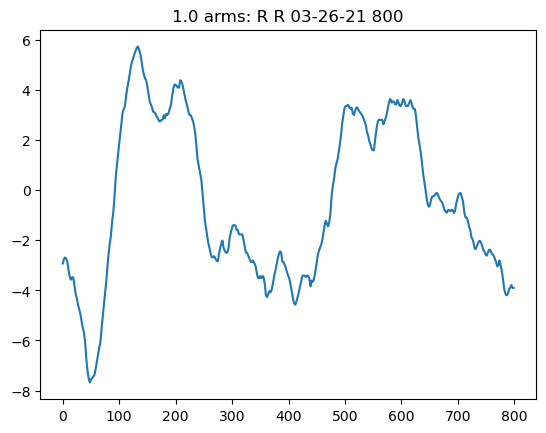

  4%|██████▎                                                                                                                                                                        | 2/56 [00:00<00:04, 12.69it/s]

1.0 arms: L R 07-08-21


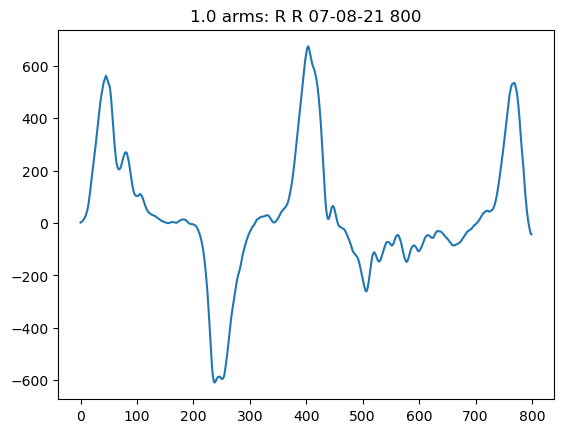

  7%|████████████▌                                                                                                                                                                  | 4/56 [00:00<00:03, 13.34it/s]

2.0 arms: L R 02-11-21


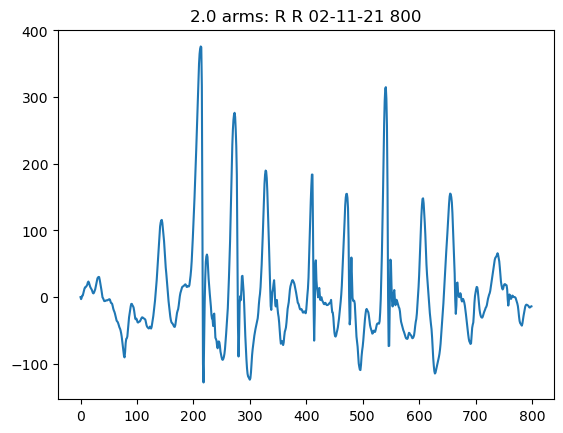

 11%|██████████████████▊                                                                                                                                                            | 6/56 [00:00<00:03, 13.78it/s]

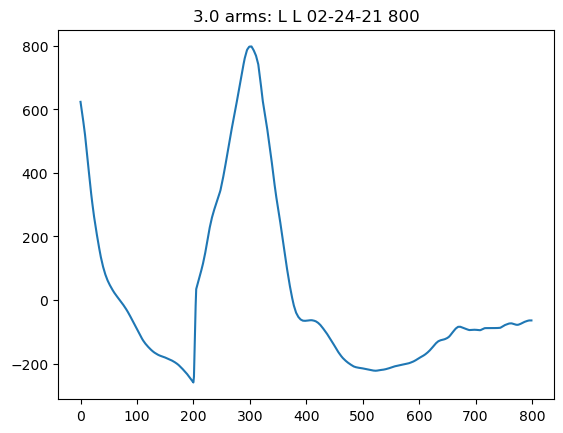

 14%|█████████████████████████                                                                                                                                                      | 8/56 [00:00<00:03, 14.16it/s]

3.0 arms: R L 02-24-21


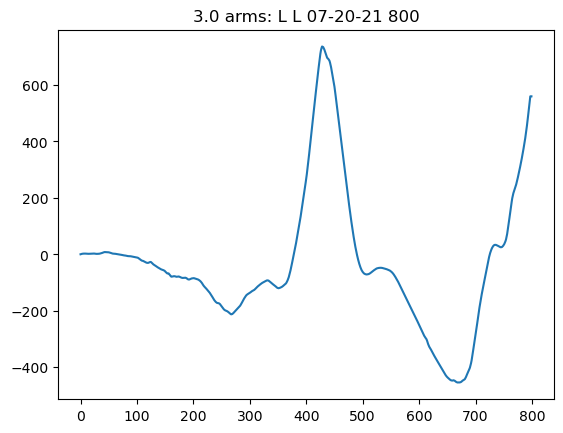

 18%|███████████████████████████████                                                                                                                                               | 10/56 [00:00<00:03, 14.41it/s]

3.0 arms: R L 07-20-21


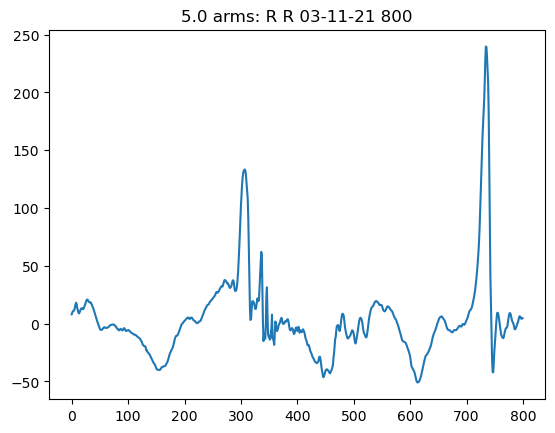

 21%|█████████████████████████████████████▎                                                                                                                                        | 12/56 [00:00<00:03, 14.21it/s]

8.0 arms: L R 04-21-21


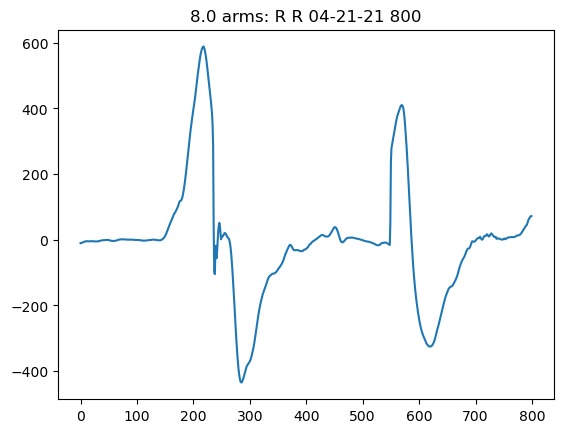

 25%|███████████████████████████████████████████▌                                                                                                                                  | 14/56 [00:00<00:02, 14.56it/s]

10.0 arms: L R 03-24-21


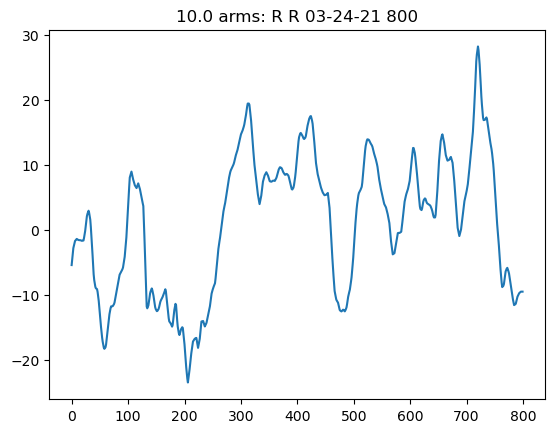

 29%|█████████████████████████████████████████████████▋                                                                                                                            | 16/56 [00:01<00:02, 14.64it/s]

11.0 arms: L R 03-24-21


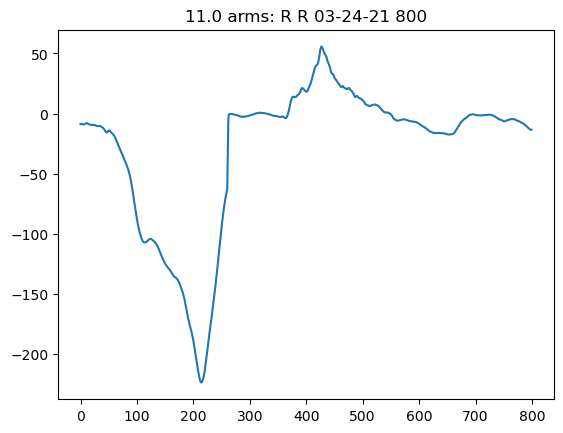

 32%|███████████████████████████████████████████████████████▉                                                                                                                      | 18/56 [00:01<00:02, 14.83it/s]

11.0 arms: L R 09-22-21


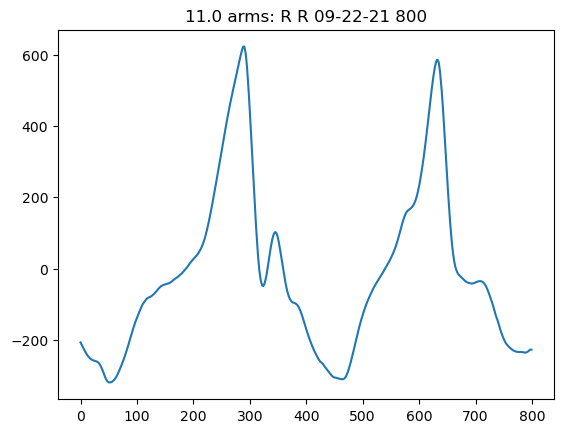

 36%|██████████████████████████████████████████████████████████████▏                                                                                                               | 20/56 [00:01<00:02, 14.91it/s]

12.0 arms: L R 04-28-21


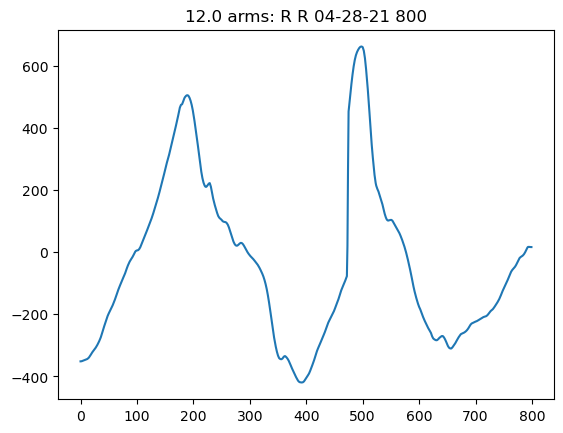

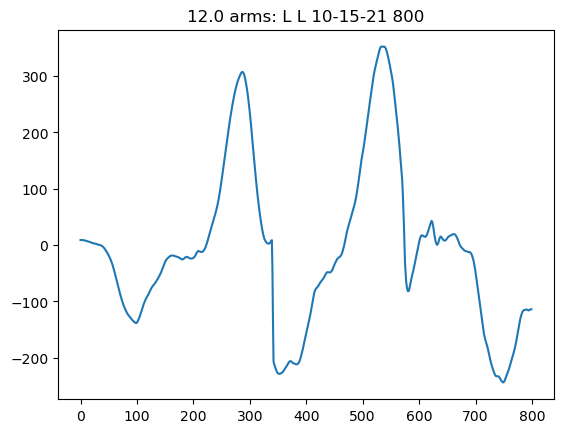

 39%|████████████████████████████████████████████████████████████████████▎                                                                                                         | 22/56 [00:01<00:02, 11.60it/s]

12.0 arms: R L 10-15-21
14.0 arms: L R 04-28-21


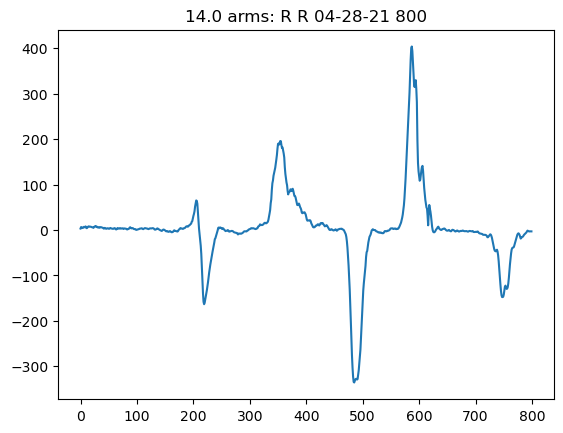

 45%|█████████████████████████████████████████████████████████████████████████████▋                                                                                                | 25/56 [00:01<00:02, 14.02it/s]

15.0 arms: L R 05-13-21


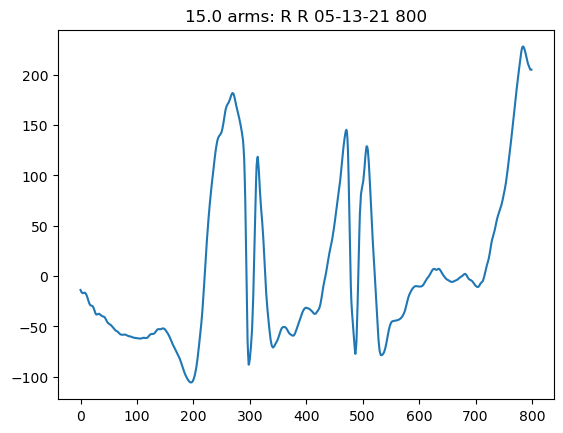

 48%|███████████████████████████████████████████████████████████████████████████████████▉                                                                                          | 27/56 [00:01<00:02, 13.94it/s]

16.0 arms: L R 05-13-21


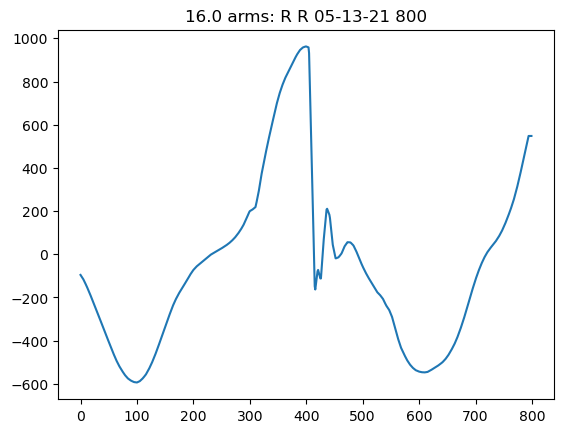

 52%|██████████████████████████████████████████████████████████████████████████████████████████                                                                                    | 29/56 [00:02<00:01, 13.71it/s]

17.0 arms: L R 05-13-21


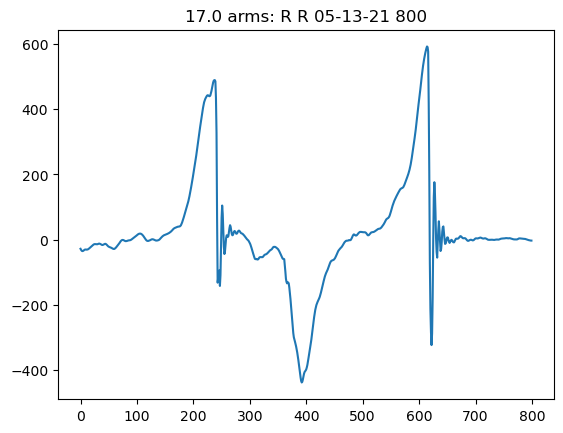

 55%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                             | 31/56 [00:02<00:01, 13.91it/s]

18.0 arms: L R 05-13-21


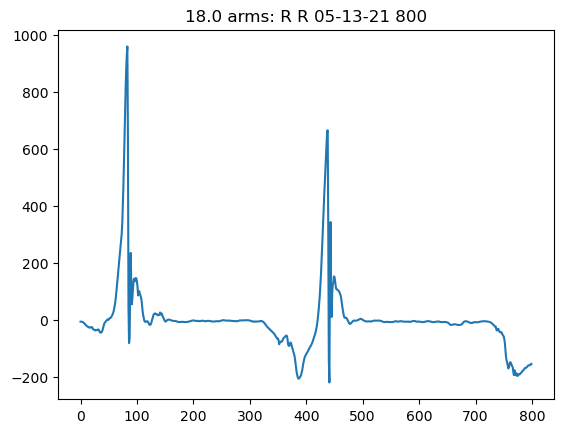

 59%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                       | 33/56 [00:02<00:01, 13.98it/s]

19.0 arms: L R 05-14-21


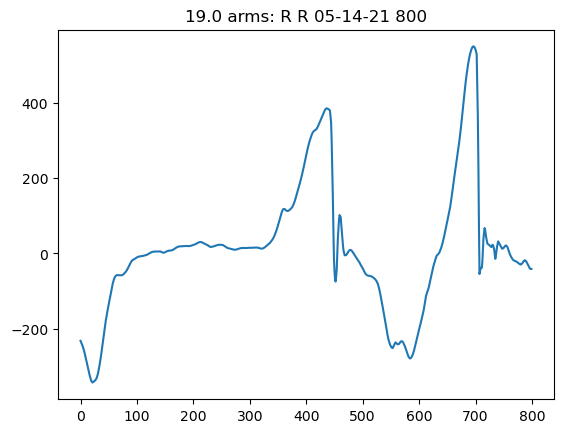

 62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                 | 35/56 [00:02<00:01, 14.58it/s]

21.0 arms: L R 06-16-21


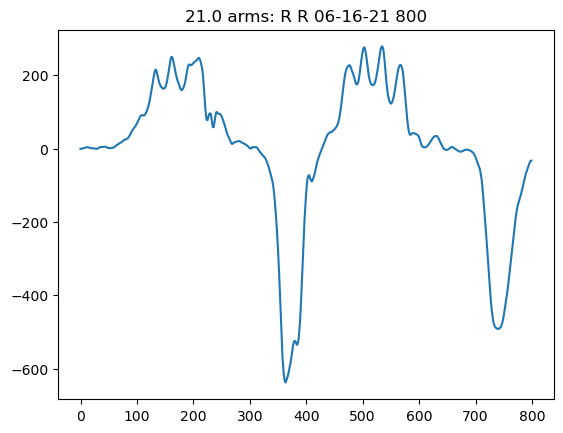

 66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                           | 37/56 [00:02<00:01, 14.33it/s]

22.0 arms: L R 06-16-21


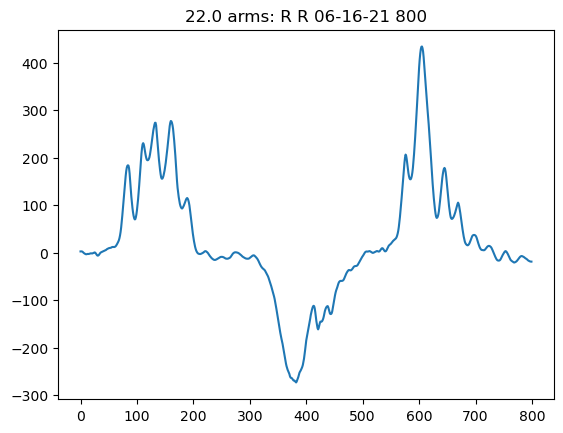

 70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 39/56 [00:02<00:01, 14.10it/s]

24.0 arms: L R 06-16-21


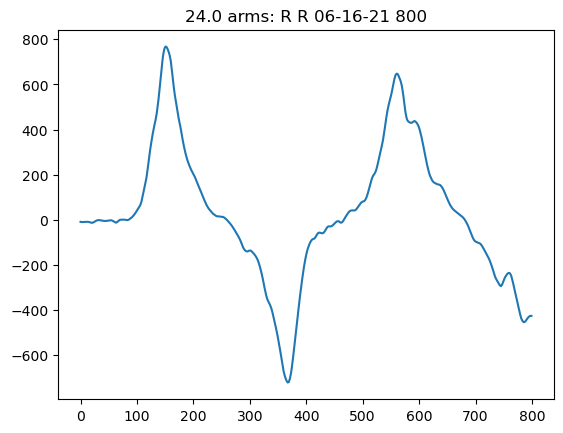

 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 41/56 [00:02<00:01, 14.02it/s]

25.0 arms: L R 06-16-21


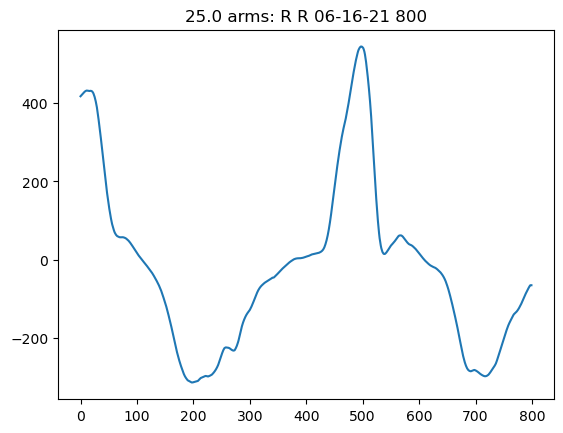

 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 43/56 [00:03<00:01, 11.78it/s]

27.0 arms: L R 06-23-21


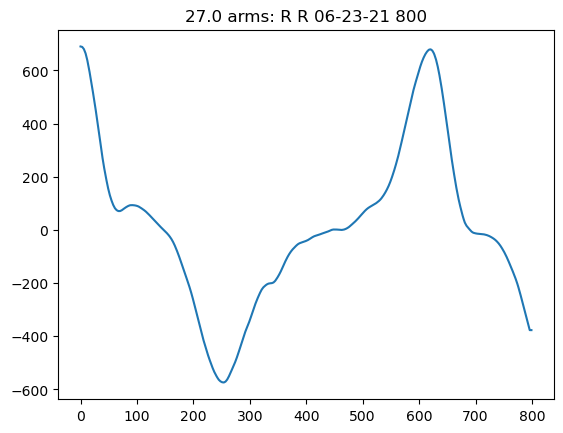

 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 45/56 [00:03<00:00, 12.57it/s]

28.0 arms: L R 06-23-21


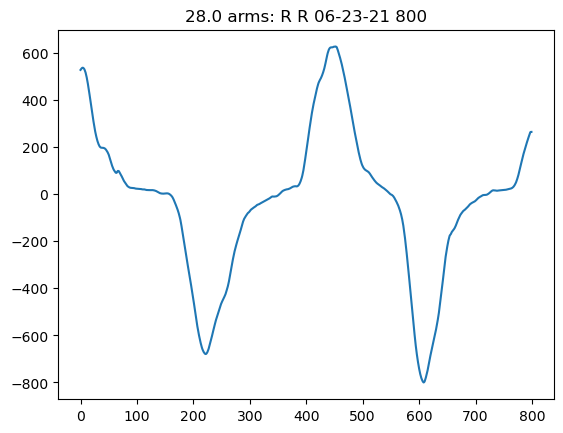

 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 47/56 [00:03<00:00, 12.96it/s]

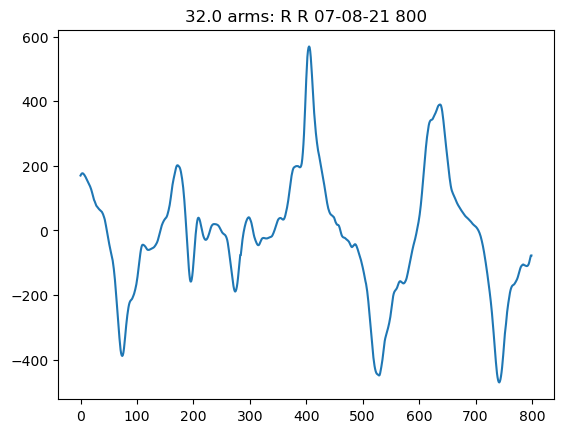

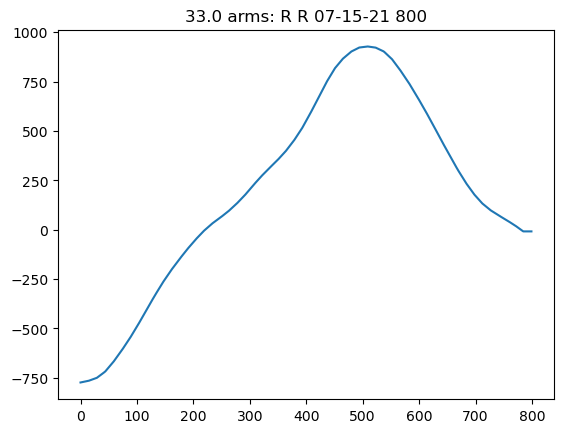

 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 49/56 [00:03<00:00, 10.60it/s]

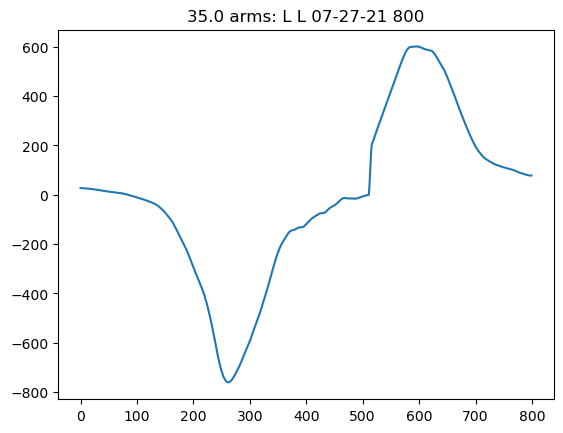

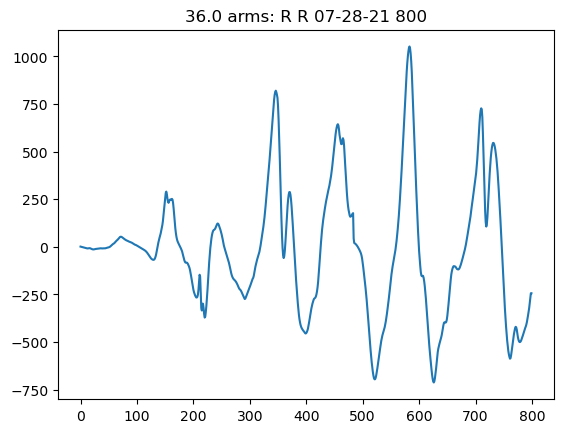

 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 51/56 [00:03<00:00,  9.33it/s]

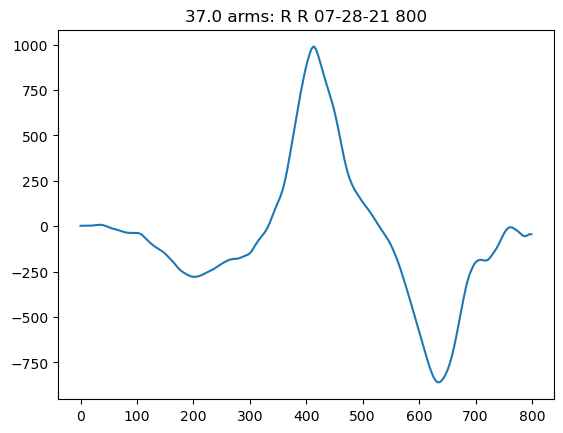

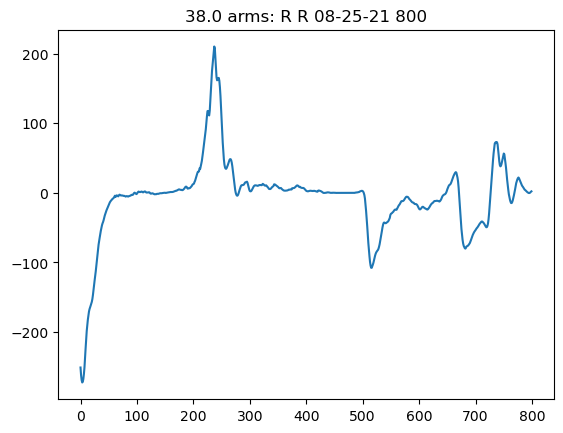

 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 53/56 [00:04<00:00,  8.73it/s]

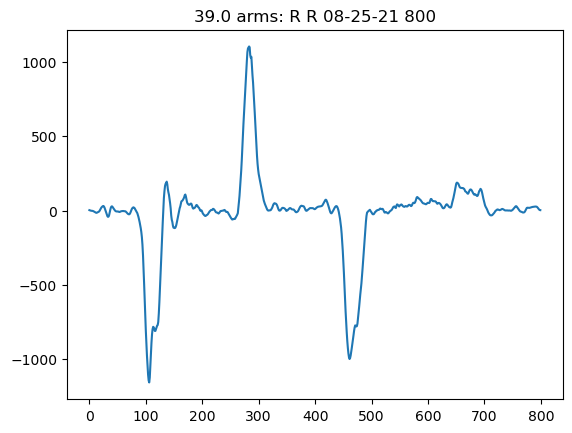

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 54/56 [00:04<00:00,  8.54it/s]

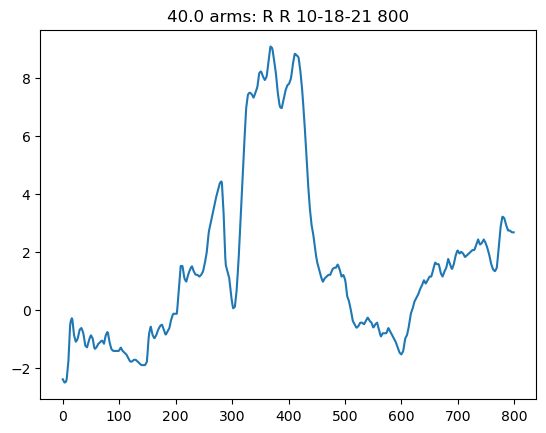

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 55/56 [00:04<00:00,  8.38it/s]

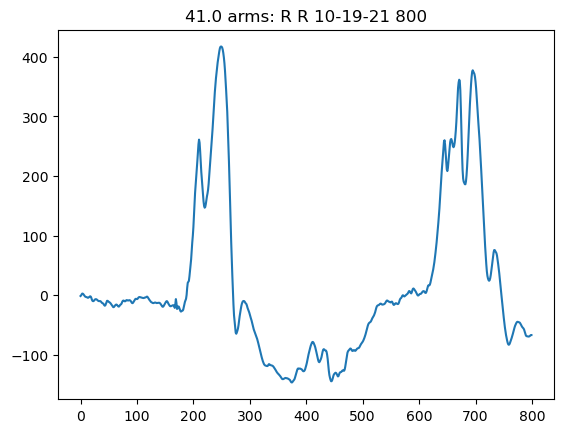

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 56/56 [00:04<00:00, 12.08it/s]


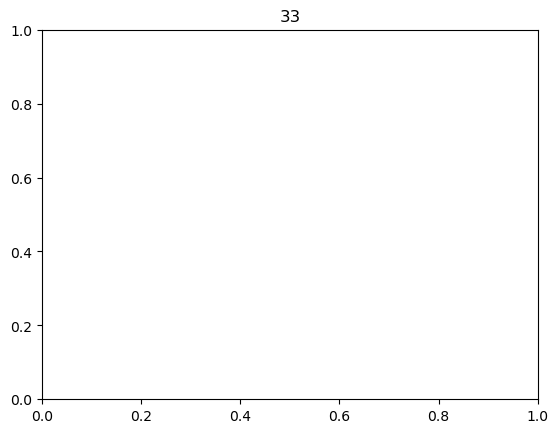

In [22]:
""" We will now generate ys, pids and cohorts """

""" This is achieved via picking one of the visists, interpolating to 400 (from interpolate and plot) and resampling """

""" Can the interpolate be causing resampling issues? """
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ys = []
pids = []
cohorts = []
visits = []
# new_sampling_freq = []

counter = 0

for i, g in tqdm(trajs_curl.groupby(['pid', 'visit','activity','arm'])):
        
    y = g['Gyroscope Y (deg/s)'].values    
    g['visit'] = g['visit'].dt.strftime('%m-%d-%y')
    
    if (not np.isnan(y).any()) and ((g['arm_abbv'].values[0]==g['Dom'].values[0])): # double check this
        
        #deltas = np.linspace(0, len(y), 400)
        #y = np.interp(deltas, np.arange(0, len(y)), y)/(deltas[1]-deltas[0])
        
        y = np.interp(np.linspace(0, len(y), 800), np.arange(0, len(y)), y)

        # total_time = len(y[:,0]) / 200
        # ns = len(sig[:,0]) / total_time
        # new_sampling_freq.append(ns)
        
        
        plt.figure()
        plt.title(str(g['pid'].values[0]) + " arms: "+ str(g['arm_abbv'].values[0]) + " " + str(g['Dom'].values[0])+ " "
                    + g['visit'].values[0] + " "+ str(len(y)))
        
        plt.plot(y) #plor Gyro y
        plt.show()
        counter += 1
        
        pids.append(g['pid'].values[0])
        visits.append(g['visit'].values[0])

        ys.append(y)
        cohorts.append(g['Cohort'].values[0])
        
    else:
        print(str(g['pid'].values[0]) + " arms: "+ str(g['arm_abbv'].values[0]) + " " + str(g['Dom'].values[0])+ " "
                    + g['visit'].values[0])
    
plt.title(counter)


""" Save files """
np.savetxt('ys_knock_wodelta.txt', ys)
np.savetxt('pids_knock_wodelta.txt', pids, fmt='%s')
np.savetxt('visits_knock_wodelta.txt', visits, fmt='%s')

In [13]:
# newys = []
# newpids = []
# newvisits = []

# for i in range(0, len(ys), 2):
#     ysarray = np.array(ys)
#     newys.append(np.concatenate((ysarray[i, :], ysarray[i+1, :])))
#     newpids.append(pids[i])
#     newvisits.append(visits[i])

# for i in range(len(newys)):
#     plt.figure()
#     plt.title(str(newpids[i]) + " " + newvisits[i]) 
#     plt.plot(newys[i])

In [14]:
# len(newys)

In [15]:
# ys_s = np.loadtxt('/mnt/sdb/arafat/U-Extend/paper_data/ys.txt')

# replacing sub 5 and 40 
# ys[10,:,0] = ys_s[10,:]
# ys[11,:,0] = ys_s[11,:]
# ys[66,:,0] = ys_s[66,:]
# ys[67,:,0] = ys_s[67,:]